In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate

## 1a)

Start with
$$\vec{x_0}=r\hat{x}$$
$$\vec{v_0}=\sqrt{\dfrac{GM_{Sun}}{r}}\hat{y}$$
$$\vec{a_0}=-\dfrac{GM_{Sun}}{r^2}\hat{x}$$
where $r$ is the distance from the Earth to the Sun.

Update according to
$$\vec{v_{n+1}}=\vec{v_{n}}+\vec{a_{n}}\Delta t$$
$$\vec{x_{n+1}}=\vec{x_{n}}+\vec{v_{n+1}}\Delta t$$
$$\vec{a_{n+1}}=-\dfrac{GM_{Sun}\vec{x_{n+1}}}{|x_{n+1}|^{3}}$$

initial position [1.496e+11 0.000e+00]
final position [ 1.49599987e+11 -6.65356690e+07]


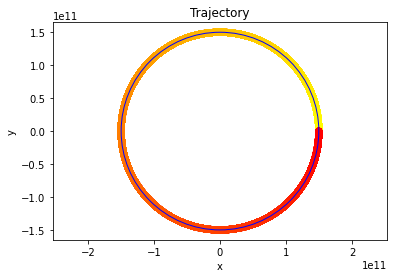

In [13]:
#physical constants
d_Earth_Sun = 1.496 * 10**(11)
GM_Sun = 1.3271 * 10**(20)
sec_per_year = 60*60*24*365.2422

order = 5 #specify the order of magnitude of steps

def Get_Trajectory(order):
    N = 10**order #number of timesteps in year
    step_size = 10**(-order) #size of timesteps
    delta_t = sec_per_year*step_size #size of timestep in seconds
    
    #initialize arrays
    t = np.empty(shape=(N+1))
    v = np.zeros(shape=(N+1,2))
    x = np.zeros(shape=(N+1,2))
    a = np.zeros(shape=(N+1,2))

    #initial values
    v[0] = [0,np.sqrt(GM_Sun/d_Earth_Sun)] #[v_x,v_y]
    x[0] = [d_Earth_Sun,0] #[x,y]
    a[0] = [-GM_Sun/d_Earth_Sun**2,0] #[a_x,a_y]
    
    #iterate through timesteps
    for n in range(N+1):
        t[n] = delta_t*n
        if n == N:
            break
        v[n+1] = v[n] + a[n] * delta_t  #update v
        x[n+1] = x[n] + v[n+1] * delta_t #update position
        r = np.linalg.norm(x[n+1]) #update distance from sun
        a[n+1] = - GM_Sun * x[n+1] / r**3 #update acceleration according to current position
    return t, x, v, a

t, x, v, a = Get_Trajectory(order)

plt.title('Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x[:,0], x[:,1], c=t, cmap='autumn_r')
Expected_orbit = plt.Circle((0, 0), d_Earth_Sun,color='b', fill=False)
plt.gca().add_patch(Expected_orbit)
plt.axis('equal')

print('initial position',x[0])
print('final position',x[-1])


For the most part, the earth is moving as expected in a circular orbit. However, the orbit is not quite closed, since during each timestep, there is a finite time period where the earth is moving straight along the same tangent instead of along the curved path it would follow in reality.

## 1b)
Conservation of energy

$$\dfrac{U}{m_{earth}} = -\dfrac{GM_{Sun}}{R}$$
$$\dfrac{T}{m_{earth}} = \dfrac{1}{2}v^2$$
$$\dfrac{E}{m_{earth}} = \dfrac{U}{m_{earth}}+\dfrac{T}{m_{earth}}$$

[4.14215239e+01 7.18135621e-02 1.38773084e-07 3.07719176e-12
 2.36510656e-14 1.74695371e-14 6.36966197e-14 6.54973259e-13]


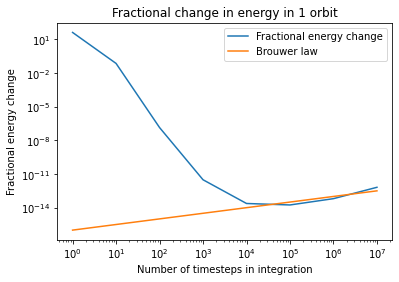

In [20]:
s = 8 #specify order of magnitude for dE vs N plot

#initialize arrays
dE = np.empty(shape=(s)) #fractional energy change
N = np.empty(shape=(s)) #number of time steps in integration

for i in range(s):
    N[i] = int(10**(i))
    t, x, v, a = Get_Trajectory(i)
    
    U_initial = -GM_Sun / np.linalg.norm(x[0]) #Initial earth potential energy per unit mass
    T_initial = 0.5 * np.linalg.norm(v[0])**2 #Initial earth kinetic energy per unit mass
    E_initial = U_initial + T_initial
    U_final = -GM_Sun / np.linalg.norm(x[-1])
    T_final = 0.5 * np.linalg.norm(v[-1])**2
    E_final = U_final + T_final

    dE[i] = np.abs(E_final-E_initial) / np.abs(E_initial)
print(dE)

plt.title('Fractional change in energy in 1 orbit')
plt.xlabel('Number of timesteps in integration')
plt.ylabel('Fractional energy change')
plt.loglog(N,dE,label='Fractional energy change')
brouwer = np.sqrt(N) * 10**(-16)
plt.loglog(N,brouwer,label='Brouwer law')
plt.legend()

As the number of timesteps increases, we initially get better conservation of energy. However at some point, the round off error from performing many operations builds up and after $10^{5}$ steps, we match up with Brouwer's law.

Text(0, 0.5, 'Fractional energy change')

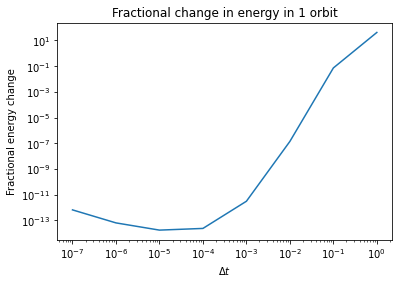

In [22]:
plt.title('Fractional change in energy in 1 orbit')
plt.loglog(1/N,dE)
plt.xlabel('$\Delta t$')
plt.ylabel('Fractional energy change')

## 1c) 
optional

Test out explicit Euler method
$$x_{n+1}=x_n+v_n\Delta t$$

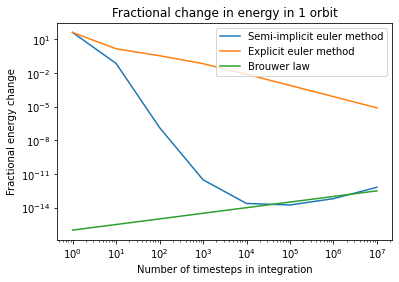

In [23]:
#Repeat code above except Get_Trajectory is altered to update position according to old velocity

def Get_Trajectory_explicit(order):
    N = 10**order #number of timesteps in year
    step_size = 10**(-order) #size of timesteps
    delta_t = sec_per_year*step_size #size of timestep in seconds
    
    #initialize arrays
    t = np.empty(shape=(N+1))
    v = np.zeros(shape=(N+1,2))
    x = np.zeros(shape=(N+1,2))
    a = np.zeros(shape=(N+1,2))

    #initial values
    v[0] = [0,np.sqrt(GM_Sun/d_Earth_Sun)] #[v_x,v_y]
    x[0] = [d_Earth_Sun,0] #[x,y]
    a[0] = [-GM_Sun/d_Earth_Sun**2,0] #[a_x,a_y]
    
    #iterate through timesteps
    for n in range(N+1):
        t[n] = delta_t*n
        if n == N:
            break
        v[n+1] = v[n] + a[n] * delta_t  #update v
        x[n+1] = x[n] + v[n] * delta_t #update position
        r = np.linalg.norm(x[n+1]) #update distance from sun
        a[n+1] = - GM_Sun * x[n+1] / r**3 #update acceleration according to current position
    return t, x, v, a

s = 8 #specify order of magnitude for dE vs N plot

#initialize arrays
dE_explicit = np.empty(shape=(s)) #fractional energy change
N = np.empty(shape=(s)) #number of time steps in integration

for i in range(s):
    N[i] = int(10**(i))
    t, x, v, a = Get_Trajectory_explicit(i)
    
    U_initial = -GM_Sun / np.linalg.norm(x[0]) #Initial earth potential energy per unit mass
    T_initial = 0.5 * np.linalg.norm(v[0])**2 #Initial earth kinetic energy per unit mass
    E_initial = U_initial + T_initial
    U_final = -GM_Sun / np.linalg.norm(x[-1])
    T_final = 0.5 * np.linalg.norm(v[-1])**2
    E_final = U_final + T_final

    dE_explicit[i] = np.abs(E_final-E_initial) / np.abs(E_initial)

plt.title('Fractional change in energy in 1 orbit')
plt.xlabel('Number of timesteps in integration')
plt.ylabel('Fractional energy change')
plt.loglog(N,dE,label='Semi-implicit euler method')
plt.loglog(N,dE_explicit,label='Explicit euler method')
brouwer = np.sqrt(N) * 10**(-16)
plt.loglog(N,brouwer,label='Brouwer law')
plt.legend()

We see that the explicit euler method performs poorly compared to the semi implicit method. We never reach roundoff

## 2a)
Due to the large range of density and temperature values explored, it will be easier to work with equations of $\log P$ and $S/k_B$ as functions of $\log T$ and $\log\rho$

$$P=nk_BT$$
$$\rightarrow n=\dfrac{\rho}{28m_u}$$
$$P=\dfrac{\rho k_BT}{28m_u}$$
$$\boxed{\log P=\log\rho+\log T+\log(\dfrac{k_B}{28m_u})}$$
$$\;\\$$
$$S=k_B (\dfrac{5}{2}-\ln(\dfrac{n}{n_Q}))$$
$$\rightarrow n_Q = (\dfrac{mk_BT}{2\pi\hbar^2})^{3/2}$$
$$\dfrac{S}{k_B}=\dfrac{5}{2}-\ln(\dfrac{\rho}{(28m_u)^{5/2}}(\dfrac{2\pi\hbar^2}{k_BT})^{3/2}))$$
$$\dfrac{S}{k_B}=-\ln(\rho)+\dfrac{3}{2}\ln T+\dfrac{5}{2}+\dfrac{3}{2}\ln(\dfrac{(28m_u)^{5/3}k_B}{2\pi\hbar^2})$$
$$\boxed{\dfrac{S}{k_B}=-\dfrac{1}{\log e}\log \rho+\dfrac{3}{2\log e}\log T+\dfrac{5}{2}+\dfrac{3}{2}\ln(\dfrac{(28m_u)^{5/3}k_B}{2\pi\hbar^2})}$$

First, we calculate and plot the true values of $\dfrac{S}{k_B}$ and $\log_{10}P$ within the range of values for $\log\rho$ and $\log T$ that interest us using the boxed equations.

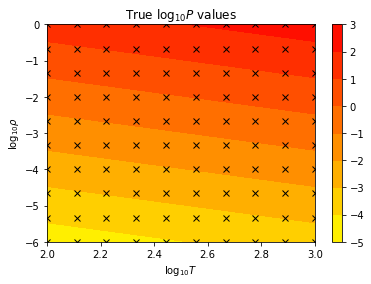

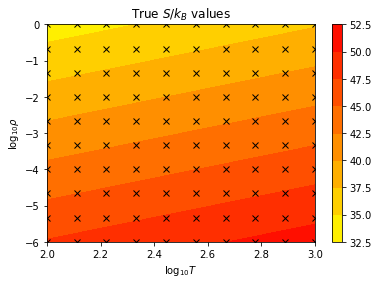

The black x mark sample points


In [29]:
#define physical constants
k_B = 1.380649 * 10**(-23)
m_u = 1.660538921 * 10**(-24)
hbar = 1.054571817 * 10**(-34)

def log_Pressure(log_T, log_rho):
    log_P = log_rho + log_T + np.log10(k_B / (28 * m_u))
    return log_P

def Entropy(log_T, log_rho):
    S_k_B = -(1/(np.log10(np.exp(1))))*log_rho + (3/(2*np.log10(np.exp(1))))* log_T + 5/2 + (3/2)*np.log((28*m_u)**(5/3)*k_B/(2*np.pi*hbar**2))
    return S_k_B

#Define coarse gridspace for producing sample points
T_log_sample_1D = np.linspace(2, 3, 10) #range of powers for T sample points (T = 10**T_sample_1D)
rho_log_sample_1D = np.linspace(-6, 0, 10) #range of powers for rho (density) sample points
T_log_sample, rho_log_sample = np.meshgrid(T_log_sample_1D, rho_log_sample_1D,indexing='ij')

#Define fine gridspace for plotting and interpolation
T_log_fine_1D = np.linspace(2, 3, 100) #range of powers for T points
rho_log_fine_1D = np.linspace(-6, 0, 100) #range of powers for rho (density) points
T_log_fine, rho_log_fine = np.meshgrid(T_log_fine_1D, rho_log_fine_1D,indexing='ij')  

#Calculate logP and S_k_B with T_log and rho_log
P_log_sample = log_Pressure(T_log_sample,rho_log_sample)
P_log_actual = log_Pressure(T_log_fine,rho_log_fine)
S_k_B_sample = Entropy(T_log_sample,rho_log_sample)
S_k_B_actual = Entropy(T_log_fine,rho_log_fine)

def Plot_contour(f, xlabel, x, ylabel, y, zlabel, z):
    fig = plt.figure(f)
    ax = plt.gca()
    plt.title(zlabel)
    fig.gca().set_xlabel(xlabel)
    fig.gca().set_ylabel(ylabel)
    cs = plt.contourf(x, y, z, cmap ='autumn_r')
    cbar = plt.colorbar(cs)
    ax.scatter(T_log_sample,rho_log_sample,marker='x',color='k',linewidths=1,label='sample points')
    plt.show()
    
Plot_contour(1,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,r'True $\log_{10}P$ values',P_log_actual)

Plot_contour(2,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,r'True $S/k_B$ values',S_k_B_actual)

print('The black x mark sample points')

Now we interpolate $\log_{10}P$ and $S/k_B$ values from the sample points in our coarse grid. We then apply the interpolation to a much finer grid.

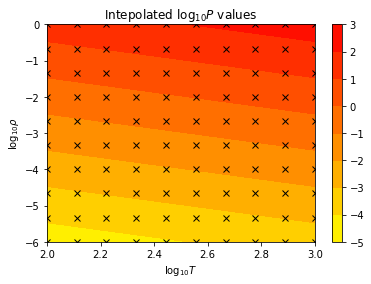

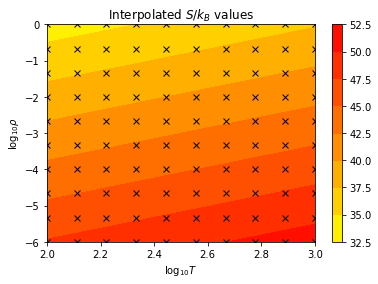

In [30]:
P_log_interp = scipy.interpolate.RectBivariateSpline(T_log_sample_1D, rho_log_sample_1D,P_log_sample)
P_log_interp_pts = P_log_interp.__call__(T_log_fine_1D, rho_log_fine_1D)

S_k_B_interp = scipy.interpolate.RectBivariateSpline(T_log_sample_1D, rho_log_sample_1D,S_k_B_sample)
S_k_B_interp_pts = S_k_B_interp.__call__(T_log_fine_1D, rho_log_fine_1D)

Plot_contour(1,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,r'Intepolated $\log_{10}P$ values',P_log_interp_pts)
Plot_contour(2,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,r'Interpolated $S/k_B$ values',S_k_B_interp_pts)

Now we quantify the accuracy of the interpolation by calculating the fractional error of the interpolated values.

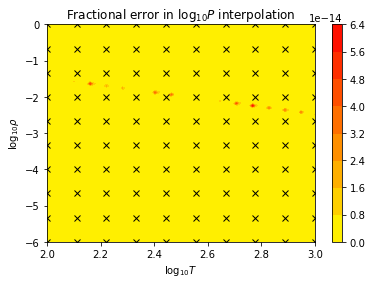

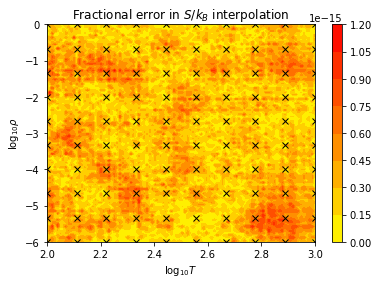

In [31]:
P_log_error = np.abs(P_log_actual-P_log_interp_pts)/np.abs(P_log_actual)

S_k_B_error = np.abs(S_k_B_actual-S_k_B_interp_pts)/np.abs(S_k_B_actual)

Plot_contour(1,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,r'Fractional error in $\log_{10}P$ interpolation',P_log_error)
Plot_contour(2,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,r'Fractional error in $S/k_B$ interpolation',S_k_B_error)

The interpolation is succesful as we are almost hitting roundoff error.

## 2b)
Verify that $-\dfrac{\partial S}{\partial n}|_T=\dfrac{1}{n^2}\dfrac{\partial P}{\partial T}|_n$

$$\dfrac{\partial S}{\partial n}|_T=\dfrac{\partial S}{\partial S/k_B}\dfrac{\partial S/k_B}{\partial\log\rho}\dfrac{\partial\log\rho}{\partial\rho}\dfrac{\partial\rho}{\partial n}$$
$$\dfrac{\partial S}{\partial n}|_T=\dfrac{k_B\log e}{n}\boldsymbol{\dfrac{\partial S/k_B}{\partial\log\rho}}$$

We can easily find $\boldsymbol{\dfrac{\partial S/k_B}{\partial\log\rho}}$ from part a) using scipy.interpolate.RectBivariateSpline.partial_derivative.

$$\dfrac{1}{n^2}\dfrac{\partial P}{\partial T}|_n=\dfrac{1}{n^2}\dfrac{\partial P}{\partial\log P}\dfrac{\partial\log P}{\partial\log T}\dfrac{\partial\log T}{\partial T}$$
$$\dfrac{1}{n^2}\dfrac{\partial P}{\partial T}|_n=\dfrac{k_B}{n}\boldsymbol{\dfrac{\partial\log P}{\partial\log T}}$$

We can easily find $\boldsymbol{\dfrac{\partial\log P}{\partial\log T}}$ from part a) using scipy.interpolate.RectBivariateSpline.partial_derivative.

Verification of the Maxwell relation reduces to proving that:
$$-\log e\boldsymbol{\dfrac{\partial S/k_B}{\partial\log\rho}}=\boldsymbol{\dfrac{\partial\log P}{\partial\log T}}$$

average value of dSkB/d(log rho) -2.302585092994046
average value of RHS of equation 1.0


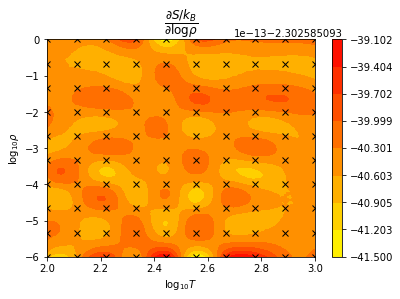

average value of LHS of equation (dlogP/dlogT) 1.0


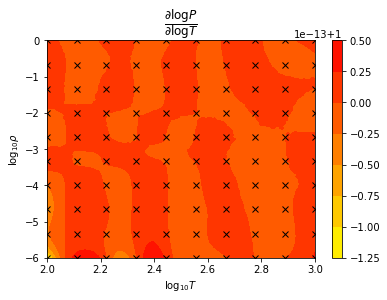

mean Fractional difference 9.909628673199231e-15


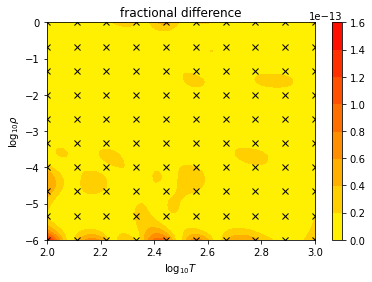

In [37]:
#Produce a new spline of the partial derivatives from our previous S/k_B interpolation.
dS_drho = S_k_B_interp.partial_derivative(0, 1)
dS_drho_pts = dS_drho.__call__(T_log_fine_1D, rho_log_fine_1D) #extend to fine grid
print('average value of dSkB/d(log rho)',np.mean(dS_drho_pts))
RHS = -(np.log10(np.exp(1))) * dS_drho_pts #Right hand side of equation
RHS_mean = -(np.log10(np.exp(1)))*np.mean(dS_drho_pts)
print('average value of RHS of equation',RHS_mean)

#plot d(S/k_B)/d(log rho)
Plot_contour(1,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,r'$\dfrac{\partial S/k_B}{\partial\log\rho}$',dS_drho_pts)

#Produce a new spline of the partial derivatives from our previous logP interpolation.
dlogP_dT = P_log_interp.partial_derivative(1, 0)
dlogP_dT_pts = dlogP_dT.__call__(T_log_fine_1D, rho_log_fine_1D) #extend to fine grid
LHS = dlogP_dT_pts
LHS_mean = np.mean(dlogP_dT_pts)
print('average value of LHS of equation (dlogP/dlogT)',LHS_mean)

#plot d(log P)/d(log T)
Plot_contour(2,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,r'$\dfrac{\partial\log P}{\partial\log T}$',dlogP_dT_pts)

#Calculate the fractional difference
Frac_diff = np.abs(RHS-LHS)/np.abs(RHS)
print('mean Fractional difference', np.mean(Frac_diff))

Plot_contour(3,r'$\log_{10}T$',T_log_fine,r'$\log_{10}\rho$',rho_log_fine,'fractional difference',Frac_diff)


We see that the fractional difference is on the order of $10^{-15}$. Maxwell's relation is satisfied. This is not surprising since the interpolation was for a function that had a linear form. For more complicated equations of state, the interpolation could have failed.